In [2]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.target[::100]
digits.data[13]

array([ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.,  0.,  4., 13.,  8.,  9.,
       16.,  8.,  0.,  0.,  0.,  0.,  6., 14., 15.,  3.,  0.,  0.,  0.,
        0., 11., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  2., 15., 11.,  0.,
        0.,  0.,  0.,  0.,  0.,  2., 15.,  4.,  0.,  0.,  1.,  5.,  6.,
       13., 16.,  6.,  0.,  0.,  2., 12., 12., 13., 11.,  0.,  0.])

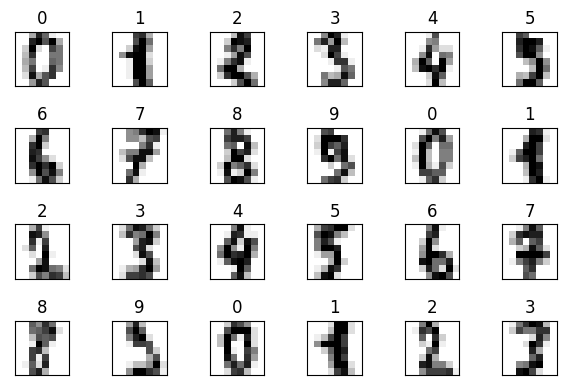

In [3]:
import matplotlib.pyplot as plt

figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(6, 4))

for item in zip(axes.ravel(), digits.images, digits.target):
    axes, image, target = item
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_yticks([])
    axes.set_xticks([])
    axes.set_title(target)
plt.tight_layout()

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=11, test_size=0.20
)



#### Создание модели

In [5]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier(
    algorithm='auto', leaf_size=30, metric='minkowski',
    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
    weights='uniform'
    )



KNeighborsClassifier()

### Прогнозироваени классов для рукописных цифр

In [6]:
predicted = knn.predict(X=X_test)
expected = y_test

print(predicted[0:20])
print(expected[0:20])

wrong = [(p, e) for (p, e) in zip(predicted, expected) if p != e]
print(wrong)

[0 4 9 9 3 1 4 1 5 0 4 9 4 1 5 3 3 8 5 6]
[0 4 9 9 3 1 4 1 5 0 4 9 4 1 5 3 3 8 3 6]
[(5, 3), (8, 9), (4, 9), (7, 3), (7, 4)]


### Оценка точности моделей

In [7]:
print(f'{knn.score(X_test, y_test):.2%}')

98.61%


#### Построение матрицы корреляций

In [8]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_true=expected, y_pred=predicted)
confusion

array([[38,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 39,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 39,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 40,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 27,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 30,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 34,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  1, 35]], dtype=int64)

#### Отчёт по классификации

In [9]:
from sklearn.metrics import classification_report
names = [str(digit) for digit in digits.target_names]
print(classification_report(expected, predicted,
    target_names=names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        39
           3       1.00      0.95      0.97        41
           4       0.98      0.98      0.98        41
           5       0.96      1.00      0.98        27
           6       1.00      1.00      1.00        30
           7       0.95      1.00      0.97        36
           8       0.97      1.00      0.99        34
           9       1.00      0.95      0.97        37

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



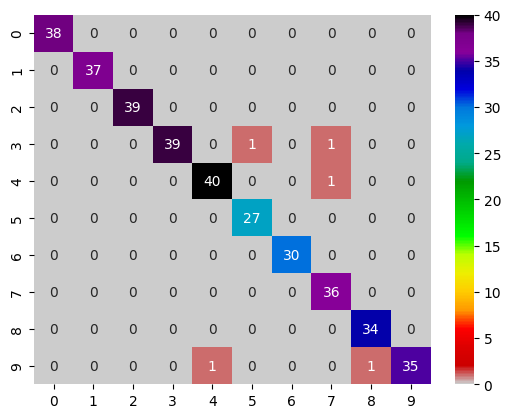

In [11]:
import pandas as pd
import seaborn as sns

conf_df = pd.DataFrame(confusion, index=range(10), columns=range(10))
axes = sns.heatmap(conf_df, annot=True, cmap='nipy_spectral_r')

## K-проходная перекрестная проверка

In [13]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, random_state=11, shuffle=True)
kfold

KFold(n_splits=10, random_state=11, shuffle=True)

In [14]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=knn, X=digits.data, y=digits.target, cv=kfold)
scores

array([0.97777778, 0.99444444, 0.98888889, 0.97777778, 0.98888889,
       0.99444444, 0.97777778, 0.98882682, 1.        , 0.98882682])

In [15]:
print(f"mean accuracy: {scores.mean():.2%}")

mean accuracy: 98.78%


In [16]:
print(f'Accuracy standard deviation: {scores.std():.2%}')

Accuracy standard deviation: 0.74%


### Выполнение нескольких моделей для поиска наилучшей

In [17]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

estimators = {
    'KNeighborsClassifier': knn,
    'SVC': SVC(gamma='scale'),
    'GaussianNB': GaussianNB(),
}


for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object,
    X=digits.data, y=digits.target, cv=kfold)
    print(f'{estimator_name:>20}: ' +
    f'mean accuracy={scores.mean():.2%}; ' +
    f'standard deviation={scores.std():.2%}')
    
    

KNeighborsClassifier: mean accuracy=98.78%; standard deviation=0.74%
                 SVC: mean accuracy=98.72%; standard deviation=0.79%
          GaussianNB: mean accuracy=84.48%; standard deviation=3.47%


### Настройка гиперпараметров

In [18]:
for k in range(1, 20, 2):
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(estimator=knn,
    X=digits.data, y=digits.target, cv=kfold)
    print(f'k={k:<2}; mean accuracy={scores.mean():.2%}; ' +
    f'standard deviation={scores.std():.2%}')

k=1 ; mean accuracy=98.83%; standard deviation=0.58%
k=3 ; mean accuracy=98.83%; standard deviation=0.72%
k=5 ; mean accuracy=98.78%; standard deviation=0.74%
k=7 ; mean accuracy=98.44%; standard deviation=0.96%
k=9 ; mean accuracy=98.39%; standard deviation=0.80%
k=11; mean accuracy=98.33%; standard deviation=0.90%
k=13; mean accuracy=97.89%; standard deviation=0.89%
k=15; mean accuracy=97.83%; standard deviation=0.95%
k=17; mean accuracy=97.50%; standard deviation=1.00%
k=19; mean accuracy=97.66%; standard deviation=0.96%
